# I. Gradient Descent untuk Regresi Logistik

**Tujuan Pembelajaran:** mampu mengimplementasikan algoritma Gradient Descent Regresi Logistik untuk Klasifikasi.

Dalam tugas ini, Anda akan diberikan sebuah data dummy untuk tugas klasifikasi. Buatlah algoritma Gradient Descent untuk membuat model prediksi label.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv('data_logistic.txt', names = ['x1', 'x2', 'Class'])
display(dataset)

,x1,x2,Class
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Melakukan visualisasi Data

Untuk memberikan gambaran mengenai sebaran data yang diberikan, kita dapat menggunakan fitur Seaborn untuk menggambar scatter plot dari data ```x1``` dan ```x2``` yang dibedakan warnanya berdasarkan labelnya pada kolom ```y```.

<AxesSubplot:xlabel='x1', ylabel='x2'>

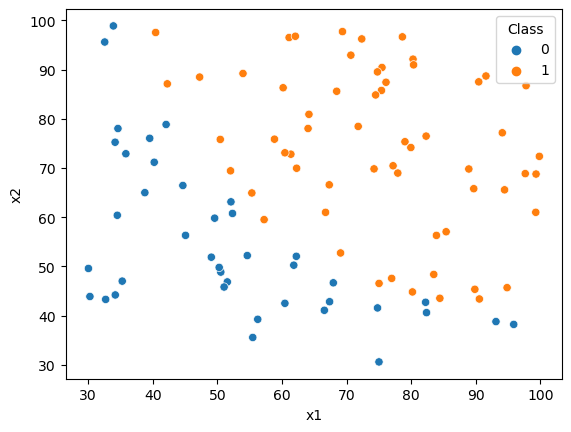

In [3]:
sns.scatterplot(x="x1", y="x2", hue='Class', data=dataset)

## Membangun model dengan Gradient Descent

Buatlah model regresi logistik (cari nilai parameter theta) untuk data yang diberikan dengan mengisi bagian yang kosong pada kode di bawah ini.

In [4]:
# X adalah matriks data latih/variabel input
# y adalah vektor label/variabel output

X = dataset.iloc[:,[0, 1]].values
y = dataset.iloc[:,-1].values


In [5]:
# Logistic Regression Grad Descent
import math
# pilih nilai hyperparameter yang sesuai
numIterations = 350000
alpha = 1e-3

def GradDescLogistic(X, y, numIterations, alpha):
    m, n = np.shape(X)
    theta = np.zeros(n+1)
    one = np.ones((m,1))
    X = np.concatenate((one, X), axis = 1)
    for i in range(numIterations):
        sig = X.dot(theta)
        theta = theta - alpha*(np.matmul(X.T, (1/(1 + np.exp(-sig))) - y))/m     
    return theta

theta= GradDescLogistic(X, y, numIterations, alpha)
print(np.array(theta))

[-9.98458352  0.085343    0.07909048]


## Membangun visualisasi Hasil Prediksi

Untuk memberikan gambaran mengenai hasil model, kita dapat menggambar scatter plot yang sama dengan ditambah kurva '*boundary decision*'. Pada gambar di bawah ini, garis berwarna hijau menunjukkan batas yang membedakan antara 'wilayah' kelas 0 dan 'wilayah' kelas 1. Sebagai ilustrasi, titik berwarna oranye di bawah garis hijau menandakan False Positive, karena label yang benar adalah 1, namun model memutuskan bahwa titik tersebut masuk dalam wilayah kelas 0.

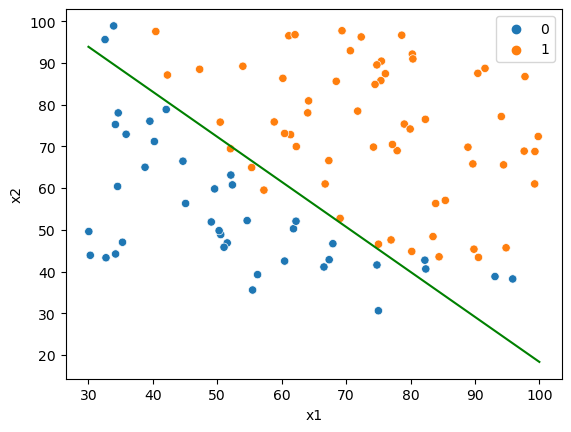

In [6]:
[theta0, theta1, theta2] = theta
m = -theta1 / theta2
b = -theta0 / theta2

def boundary(x, m, b):
  return m*x + b

x_plot = np.linspace(30, 100, 1000)
y_plot = boundary(x_plot, m, b)
data_boundary = pd.DataFrame({"x": x_plot, "y": y_plot})

p1 = sns.scatterplot(x="x1", y="x2", hue='Class', data=dataset)
p2 = sns.lineplot(data=data_boundary, x='x', y='y', color='g')

## Membuat Confusion Matrix

Untuk mengevaluasi keberhasilan model yang sudah dibuat, buatlah Confusion Matrixnya. Setelah confusion matrix dihitung, maka ukuran performansi lainnya dapat dibuat, seperti accuracy, precision, recall, dan F1.

In [7]:
def create_y_pred(X, theta):
    m, n = np.shape(X)
    one = np.ones((m,1 ))
    X = np.concatenate((one, X), axis = 1)
    sig_2 = X.dot(theta)
    y_pred = np.array([(1/(1 + np.exp(-sig_2[i]))) for i in range(len(sig_2))])
    y_pred = np.where(y_pred >= 0.5, 1,  0)
    return y_pred
y_pred = create_y_pred(X, theta)

In [8]:
# y_true adalah vektor yang berisi label yang sesungguhnya (dari data latih)
# y_pred adalah vektor yang berisi label dari hasil prediksi model
def create_confusion_matrix(y_true, y_pred):
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            TP += 1
        if y_true[i] == 1 and y_pred[i] == 0:
            FN += 1
        if y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
        if y_true[i] == 0 and y_pred[i] == 0:
            TN += 1
    return [[TP, FN], [FP, TN]]

c_mat = create_confusion_matrix(y, y_pred)
[[TP, FN], [FP, TN]] = c_mat

# Menghitung berbagai ukuran performansi model
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, F1)

0.91 0.9047619047619048 0.95 0.9268292682926829


# II. Klasifikasi Multikelas

**Tujuan Pembelajaran:** mampu menggunakan sklearn untuk menerapkan tugas klasifikasi multikelas terhadap data nyata.

Dalam halaman ini, modul akan mendemonstrasikan penggunaan library sklearn untuk suatu dataset Iris yang sangat terkenal dan klasik. Sementara itu, Anda akan diberikan sebuah data latih untuk klasifikasi biji kedelai. Anda diminta untuk **mereplikasi langkah-langkah yang dicontohkan untuk diterapkan ke dataset biji kedelai**. Gantilah code di bawah ini beserta dengan penjelasannya menjadi sesuai untuk kasus biji kedelai.

Credit Dataset:

KOKLU, M. and OZKAN, I.A., (2020), "*Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.*" Computers and Electronics in Agriculture, 174, 105507.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

## Memuat Dataset

In [10]:
from sklearn import datasets
# dataset Iris tersedia di library sklearn karena sudah sangat klasik.

# load dataset 
iris = datasets.load_iris()

# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = iris.data
display(df)

# Notes:
# the labels 0, 1, 2 at "target" column represent Iris species ‘setosa’, ‘versicolor’, and ‘virginica’, respectively.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
# dataset drybeans
data = pd.read_csv('Dry_Beans_Dataset.csv')
display(data)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## Mempersiapkan Data Latih dan Data Uji

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(["Class"], axis = 1)
y = data[["Class"]]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
display(X_train)
display(y_train)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
2663,2664,69112,1103.241,396.140798,223.268240,1.774282,0.826042,70526,296.641419,0.675582,0.979951,0.713547,0.748828,0.005732,0.001112,0.560744,0.994917
7648,7649,38509,733.994,272.173897,180.771739,1.505622,0.747575,38979,221.429857,0.763295,0.987942,0.898229,0.813560,0.007068,0.001910,0.661880,0.996541
7480,7481,35734,704.049,255.609616,178.903958,1.428753,0.714230,36235,213.302466,0.718705,0.986174,0.905911,0.834485,0.007153,0.002140,0.696366,0.994935
3339,3340,96319,1252.315,434.980462,283.482724,1.534416,0.758465,98108,350.195888,0.748731,0.981765,0.771782,0.805084,0.004516,0.001170,0.648161,0.994548
4179,4180,67844,1014.851,390.126383,225.082546,1.733259,0.816781,69449,293.907577,0.696529,0.976890,0.827783,0.753365,0.005750,0.001143,0.567559,0.983727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,906,38653,713.967,250.195543,196.972511,1.270205,0.616603,38972,221.843477,0.772303,0.991815,0.952877,0.886680,0.006473,0.002468,0.786202,0.998638
5192,5193,83287,1109.766,432.876449,246.319533,1.757378,0.822317,83902,325.644441,0.760140,0.992670,0.849815,0.752280,0.005197,0.001027,0.565926,0.994545
12172,12173,33221,672.871,249.406872,169.896424,1.467994,0.732096,33567,205.665483,0.761112,0.989692,0.922059,0.824618,0.007508,0.002141,0.679995,0.998229
235,236,34676,668.424,226.447507,195.193788,1.160116,0.506938,34982,210.121047,0.777907,0.991253,0.975292,0.927902,0.006530,0.002986,0.861002,0.998862


,Class
2663,BARBUNYA
7648,SIRA
7480,SIRA
3339,BARBUNYA
4179,CALI
...,...
905,SEKER
5192,CALI
12172,DERMASON
235,SEKER


In [13]:
y_test

,Class
10057,SIRA
13354,DERMASON
13141,DERMASON
8634,SIRA
12579,DERMASON
...,...
10130,DERMASON
4119,CALI
7547,SIRA
2625,BARBUNYA


## Membangun Model Klasifikasi

In [14]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
logreg = LogisticRegression()

# Performing the model building
logreg.fit(X_train,y_train)

# Predicting the labels of the test dataset
y_pred=logreg.predict(X_test)

# Comparing the true labels vs predicted labels
compare = pd.DataFrame({"y_true": y_test["Class"], "y_pred": y_pred})
display(compare)

C:\Users\Christo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_true,y_pred
10057,SIRA,SIRA
13354,DERMASON,DERMASON
13141,DERMASON,DERMASON
8634,SIRA,SIRA
12579,DERMASON,DERMASON
...,...,...
10130,DERMASON,DERMASON
4119,CALI,CALI
7547,SIRA,SIRA
2625,BARBUNYA,BARBUNYA


## Membuat Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted label')

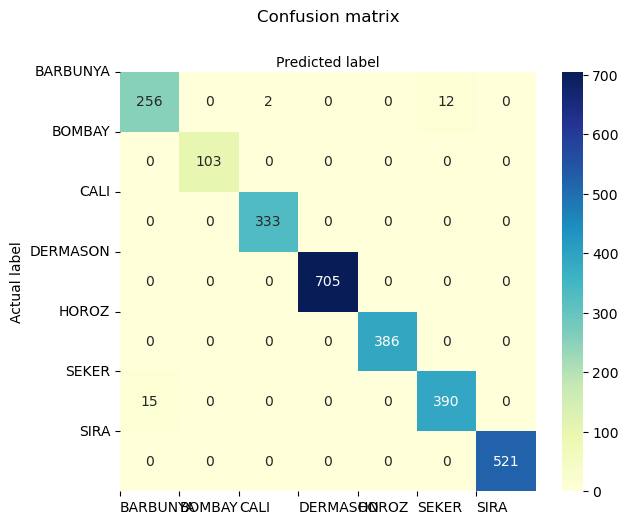

In [15]:
from sklearn import metrics

# Fungsi untuk menghitung confusion matrix

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Tuliskan label dari masing-masing kelas sesuai urutan
# class_names= ["SIRA", "DERMASON",  "CALI", "BARBUNYA", "SEKER", "HOROZ", "BOMBAY"]
class_names = data["Class"].unique()
class_names=np.sort(class_names)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=class_names)

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, ha="left")
plt.yticks(tick_marks, class_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Menampilkan Ukuran Performansi Klasifikasi

Dalam klasifikasi multi kelas, ukuran performasi seperti Accuracy, Precision, Recall, dan F1 dihitung nilainya untuk setiap label/kelas dari klasifikasi. Dengan demikian, ukuran performansi hasil model klasifikasi untuk suatu kelas mungkin bisa berbeda dibading ukuran untuk kelas lainnya.

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.95      0.95       270
      BOMBAY       1.00      1.00      1.00       103
        CALI       0.99      1.00      1.00       333
    DERMASON       1.00      1.00      1.00       705
       HOROZ       1.00      1.00      1.00       386
       SEKER       0.97      0.96      0.97       405
        SIRA       1.00      1.00      1.00       521

    accuracy                           0.99      2723
   macro avg       0.99      0.99      0.99      2723
weighted avg       0.99      0.99      0.99      2723



## Kesimpulan Akhir
Berdasarkan confusion matrix diatas, bisa dilihat bahwa kalsifikasi dengan regresi logistik telah berjalan dengan baik, karena terdapat 4 dari 7 kelas yang mendapatkan akurasi sempurna. 3 kelas lainya juga memiliki ukuran performansi yang sudah sangat baik karena sudah melebihi 90%. Kesimpulannya, confusion matrix yang ada diatas menunjukan bahwa model tersebut sudah sangat akurat dan memiliki performa yang baik di semua kelas, sehingga model yang telah kami buat bisa digunakan untuk memprediksi data dry beans selanjutnya.